## Import data

This model can be used to help businesses identify customer sentiment in relation to their products. Since the only input is a text review, the company could further gauge their customers feelings from comments; for example, on social media pages, blogs, and more in which star ratings are not readily available.

The final model is a linear regression that predicts low, average, and high reviews.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['font.size'] = 11

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 500)

Source: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [2]:
df=pd.read_csv('./clothingreviews.csv')

In [3]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",5,1,0,General,Dresses,Dresses


## EDA

In [4]:
df.shape

(23486, 11)

In [5]:
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [6]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
df.dropna(subset=['Review Text'], inplace=True)

In [9]:
df.dropna(subset=['Department Name'], inplace=True)

In [10]:
#count words in each review

In [11]:
df['reviewWords'] = [len(x.split()) for x in df['Review Text'].tolist()]

In [12]:
#count total chars in each review

In [13]:
df['reviewChars'] = [len(x) for x in df['Review Text'].tolist()]

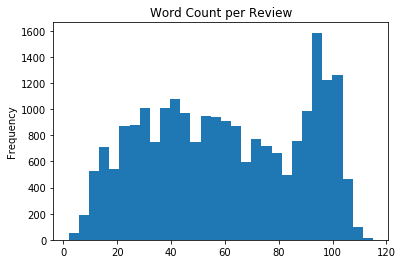

In [14]:
df['reviewWords'].plot.hist(bins=30,label='words');
plt.title('Word Count per Review');

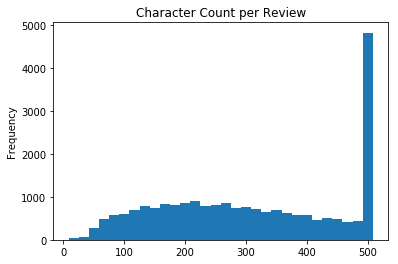

In [15]:
df['reviewChars'].plot.hist(bins=30, label='chars');
plt.title('Character Count per Review');

In [17]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,reviewWords,reviewChars
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,8,53
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,98,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses,98,488
6,6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits,101,496
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,1,4,General Petite,Tops,Knits,97,482
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,1,0,General,Dresses,Dresses,34,166
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",5,1,0,General,Dresse

In [18]:
#these are the possible ratings
df['Rating'].unique()

array([4, 5, 3, 2, 1])

In [19]:
df['departmentValue']=df['Department Name'].map({"Intimate":1, "Dresses":2, "Bottoms":3, "Tops":4, "Jackets":5, "Trend":6})

In [20]:
df.rename(columns = {'Review Text':'reviewText', 'Department Name': 'departmentName'}, inplace = True) 

In [21]:
df.head(45)

,Unnamed: 0,Clothing ID,Age,Title,reviewText,Rating,Recommended IND,Positive Feedback Count,Division Name,departmentName,Class Name,reviewWords,reviewChars,departmentValue
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,8,53,1
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303,2
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,98,500,2
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,3
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,4
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses,98,488,2
6,6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits,101,496,4
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,1,4,General Petite,Tops,Knits,97,482,4
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,1,0,General,Dresses,Dresses,34,166,2
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric u

In [22]:
df['sentiment']=df['Rating'].map({1:0, 2:0, 4:2, 5:2, 3:1})

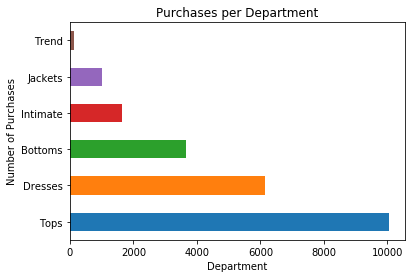

In [23]:
df['departmentName'].value_counts().plot(kind='barh')

plt.xlabel('Department');
plt.ylabel('Number of Purchases');
plt.title('Purchases per Department');

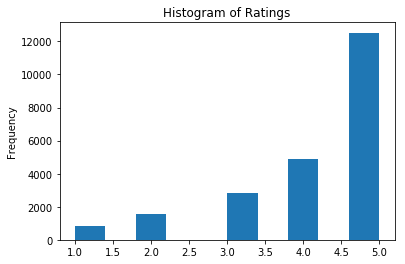

In [24]:
df['Rating'].plot.hist();

plt.title('Histogram of Ratings');

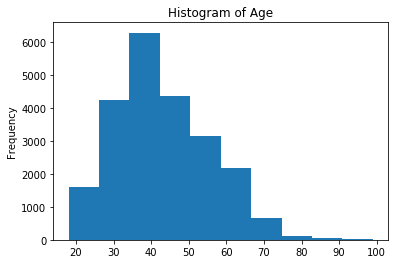

In [25]:
df['Age'].plot.hist();

plt.title('Histogram of Age');

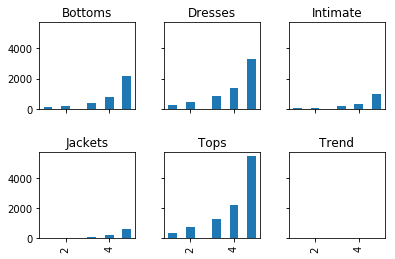

In [26]:
df.hist(column='Rating', by='departmentName', sharex=True, sharey=True, layout=(2,3));

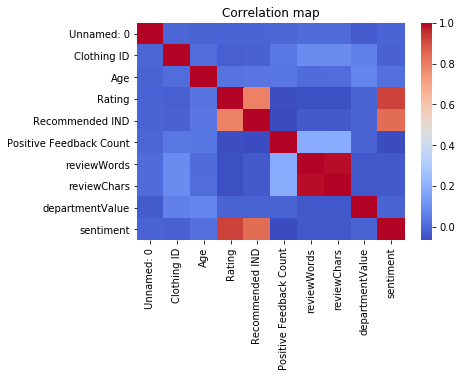

In [27]:
sns.heatmap(df.corr(),cmap='coolwarm');

plt.title('Correlation map');

In [28]:
highDF=df[df.sentiment==2]

highlist=highDF.reviewText.tolist()

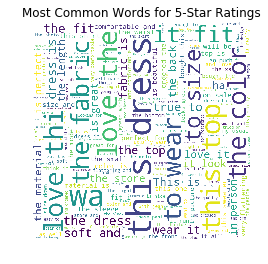

In [29]:
#!pip install wordcloud
from wordcloud import WordCloud
Highwordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white').generate(str(highlist))
# Generate plot
plt.imshow(Highwordcloud)
plt.title('Most Common Words for 5-Star Ratings');
plt.axis("off")
plt.show()

In [30]:
lowDF=df[df.sentiment==0]

lowlist=lowDF.reviewText.tolist()

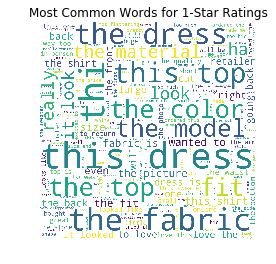

In [31]:
from wordcloud import WordCloud
Lowwordcloud = WordCloud(width = 1200, height = 1200, 
            background_color ='white').generate(str(lowlist))
# Generate plot
plt.imshow(Lowwordcloud)
plt.title('Most Common Words for 1-Star Ratings');
plt.axis("off")
plt.show()

## Logistic Regression Final Model

After testing out logistic regression and multinomial NB models with both count vectorizer and tfidf as well as using the NLTK package polarity method, on the toy dataset only including 1 and 5-star reviews, the logistic regression using count vectorizer scored the best in accuracy, precision, and recall. Therefore, I decided to use the combination of count vectorizer and logistic regression on the full dataset, involving hypertuning the parameters with a grid search algorithm.In order for the model to predict more than two classes, I had to set multi_class to multinomial. Furthermore, the solver had to be changed. I changed the solver to newton-cg, which handles L2 regularization at no penalty. Since the data contains a lot more positive reviews than negative reviews, the false negative rate was a lot higher. Therefore to improve the model, the focus should be on recall and include a larger set of training values with scores of 0 or 1. The model had a final accuracy score of .83, which is 5 percent higher than the null accuracy.

In [32]:
X=df.reviewText
y=df.sentiment

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [156]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#instantiate
vect = CountVectorizer(lowercase=False, ngram_range=(1,3))
#fit
vect.fit(X_train)
#transform
X_train_dtm = vect.transform(X_train)

In [157]:
# transform testing data (using fitted vocabulary) into a document-term matrix (DON'T USE .FIT ON TEST DATA!!!)
X_test_dtm = vect.transform(X_test)
X_all_dtm = vect.transform(X)

In [158]:
# view X_train_dtm as a dense matrix
print(X_train_dtm.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [159]:
# count how many times EACH token appears across ALL messages in X_train_dtm
import numpy as np
X_train_counts = np.sum(X_train_dtm.toarray(), axis=0)
# store token names
X_train_tokens = vect.get_feature_names()
# create a DataFrame of tokens with their counts
tokenFrame=pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts}).sort_values('count', ascending=True)
tokenFrame.sort_values(by='count', ascending=False).head(20)

,token,count
361967,the,30348
23763,and,22300
187376,it,20567
179746,is,13503
393304,to,10451
384749,this,9609
173330,in,8979
439248,with,6241
260126,on,6175
70926,but,6115


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression( multi_class='multinomial', solver='newton-cg')
logreg.fit(X_train_dtm, y_train)
y_pred = logreg.predict(X_test_dtm)

In [39]:
print("The accuracy score is: ",metrics.accuracy_score(y_test, y_pred))

The accuracy score is:  0.8244652642743504


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.2, 0.4, 0.6, 0.8, 1.0],
              'fit_intercept' : [True,False],
             'max_iter' : [1000,10000]}

In [41]:
# grid_search = GridSearchCV(logreg, param_grid, cv=5)
# grid_search.fit(X_train_dtm, y_train)

In [42]:
# grid_search.best_params_

In [43]:
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial',C=0.2, solver='newton-cg')
logreg.fit(X_train_dtm, y_train)
y_pred = logreg.predict(X_test_dtm)

In [44]:
print("The accuracy score is: ",metrics.accuracy_score(y_test, y_pred))

The accuracy score is:  0.8257026692593248


In [45]:
y_pred_class_all2=logreg.predict(X_all_dtm)

In [46]:
df['preds_log']=y_pred_class_all2

In [47]:
# confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[ 256  137  193]
 [ 144  207  337]
 [  56  119 4208]]


As you can see, there are a lot more false negatives than false positives, due to the fact that there is a lot more training data from 5-star reviews

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect2 = TfidfVectorizer(lowercase=False)
vect2.fit(X_train)
X_train_dtm=vect2.transform(X_train)

In [49]:
X_test_dtm=vect2.transform(X_test)

In [50]:
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial',C=0.2, solver='newton-cg')
logreg.fit(X_train_dtm, y_train)
y_pred = logreg.predict(X_test_dtm)

Even after testing out multiple parameters, Tfidf is less accurate than Count Vectorizer

In [51]:
print(metrics.accuracy_score(y_test, y_pred))

0.8055506452183135


So, although .8257 may not seem particularly accurate, the null accuracy score if 2 was predicted for all reviews would only be .7748.

In [52]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

2    0.774792
Name: sentiment, dtype: float64

## Ensemble trees

Although I did not try tree-based models on the toy dataset, I was curious about how they would fit a multi-class dataset, so I tried it out. In order to possibly improve this model, I would have had to use a far larger array of possible parameters in the Grid Search.

In [54]:
from sklearn.tree import DecisionTreeClassifier

# grow each tree deep
treeClass = DecisionTreeClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [2, 4, 6, 8, 10],
              'min_samples_split' : [2, 4, 6, 8, 10]}

In [56]:
# grid_search = GridSearchCV(treeClass, param_grid, cv=5)
# grid_search.fit(X_train_dtm, y_train)

In [57]:
#grid_search.best_params_

In [58]:
treeClass = DecisionTreeClassifier(max_depth=6, min_samples_split=6)

In [59]:
treeClass.fit(X_train_dtm, y_train)
y_pred = treeClass.predict(X_test_dtm)

In [60]:
#calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7806257733781156


In [61]:
from sklearn.ensemble import BaggingClassifier
bagClass = BaggingClassifier(DecisionTreeClassifier(), n_estimators=25, bootstrap=True, oob_score=True, random_state=42)

/Users/larissalieberson/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [63]:
bagClass.fit(X_train_dtm, y_train)
y_pred = bagClass.predict(X_test_dtm)

In [64]:
print(metrics.accuracy_score(y_test, y_pred))

0.7958281774792293


As we can see, this algorithm did not perform well; however, it performed slightly better than the null accuracy and the singular tree, when bagging was used.

## Multinomial NB

I tested out Multinomial NM because it is commonly used in text-classification problems because it is intuitive and considers conditional probability. However, the independence assumption is difficult to realistically assume in the case of the English language. This simple algorithm performed extremely well in all regards; however, logistic regression was slightly better. Metrics for accuracy, precision, and recall were all above .96--3 percentage points above the null accuracy. 

In [65]:
df['sentiment_r']=df['Rating'].map({1:0, 2:2, 4:2, 5:1, 3:2})

In [66]:
df.drop(df[df['sentiment_r']==2].index,inplace=True)

In [67]:
X=df.reviewText
y=df.sentiment_r

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#instantiate
vect = CountVectorizer()
#fit
vect.fit(X_train)
#transform
X_train_dtm = vect.transform(X_train)

In [70]:
# transform testing data (using fitted vocabulary) into a document-term matrix (DON'T USE .FIT ON TEST DATA!!!)
X_test_dtm = vect.transform(X_test)
X_all_dtm = vect.transform(X)

In [71]:
# view X_train_dtm as a dense matrix
print(X_train_dtm.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [72]:
#when adding 'stop_words='english'' or capitalization='True', score decreased

In [73]:
# count how many times EACH token appears across ALL messages in X_train_dtm
import numpy as np
X_train_counts = np.sum(X_train_dtm.toarray(), axis=0)
X_train_counts

array([41, 18,  1, ...,  2,  1,  1])

In [74]:
# store token names
X_train_tokens = vect.get_feature_names()

In [75]:
# create a DataFrame of tokens with their counts
tokenFrame=pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts}).sort_values('count', ascending=True)

In [76]:
tokenFrame.sort_values(by='count', ascending=False).head(20)

,token,count
8740,the,30695
655,and,22302
4664,it,20649
4651,is,13505
8789,this,11598
8889,to,10455
4471,in,8996
9691,with,6244
5948,on,6179
1493,but,6118


In [77]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [78]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [79]:
y_pred_class_all=nb.predict(X_all_dtm)

In [80]:
df['preds_nb']=y_pred_class_all

In [81]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,reviewText,Rating,Recommended IND,Positive Feedback Count,Division Name,departmentName,Class Name,reviewWords,reviewChars,departmentValue,sentiment,preds_log,sentiment_r,preds_nb
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303,2,2,2,1,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,3,2,2,1,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,4,2,2,1,1
6,6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits,101,496,4,2,2,1,1
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5,1,0,General,Dresses,Dresses,34,166,2,2,2,1,1


In [82]:
# confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_class))

[[  84  118]
 [   9 3126]]


Interestingly, although it may seem this is a far better model than the final, it is only 3 percent more accurate than the null accuracy

In [83]:
# calculate null accuracy
y_test_binary = np.where(y_test==1, 1, 0)
print(y_test_binary.mean())

0.93946658675457


In [84]:
# calculate accuracy of class predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.9619418639496554


In [85]:
print(metrics.recall_score(y_test, y_pred_class))

0.9971291866028709


In [86]:
print(metrics.precision_score(y_test, y_pred_class))

0.9636251541307028


In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.90      0.42      0.57       202
          1       0.96      1.00      0.98      3135

avg / total       0.96      0.96      0.96      3337



In [88]:
#find most common words for FN
FP=pd.DataFrame(X_test[y_test < y_pred_class])

In [89]:
FP

,reviewText
22587,"I ordered this in both an extra small and a small... i found that there was a very big difference in the two sizes- the extra small was true to size and had a great width, but was shorter in length than i would've liked (if it shrunk at all, it would've been unwearable). the small was quite a jump in size and was a little wider than i liked, but i decided to keep that one. \r\n\r\nthe top was very cute and comfortable when i wore it, however i just washed it once on delicate in cold water an..."
6952,The shirt is very big. it would be cute as a maternity shirt.
21592,"This simple lace top is beautiful and easy to wear, but do not wash it. the hem completely fell apart for me!"
10640,I was very disappointed in the quality of this top. the first time i wore it it snagged right in the front. i had to pull the thread under so it wasn't exposed. i put it in the wash in the gentle cycle and it was destroyed with several more snags when i removed it from the machine. this top is extremely delicate and doesn't withstand normal everyday casual wear although it's s casual lightweight sweater. now it's just a wear around the house ratty throw around shirt.
5467,"1. i like a shorter jacket, but this one was poorly made and poorly fit.\n\n2. the sleeves were way too tight. i'm a size 10 or 12, and the large which would be a 14 had tight sleeves that wrinkled up my arms, and the hem of the sleeve turned inside out.\n\n3. i ordered both a medium (size 10) and a large (size 14) , and neither hung right. the m too tight, and the large too loose in the body and too tight in the sleeves.\n\n4. very polyester with lots of static.\n\n5. cute idea, but not ver..."
12990,I really wanted to love this piece but it was very large. i'm 5'2 and ordered xs/s and i have return due to size.
18822,"I thought this top was so cute but when i tried it on, it is so big on the bottom, it looks like a tent. i normally wear a l or xl and took it back to the store to try on a medium and that one fit better but the bottom was still too big. sad."
16316,This is very large. i normally am a s/m and i took this in an x. it is a beautiful dress in color and fit but picks up any stain and i have had to have it dry cleaned after every use.
5121,There's a reason the model is holding her arms up in all the frontal views. it hides the very weird wide top part of the sleeve that absolutely destroys and distorts an otherwise beautiful blouse. the print is lovely but the fit is very odd. it's pulls at and is very tight through the bust too. i wear medium or large and ordered size large. if you're less well endowed this might be an okay choice for you. but i have to say this blouse made me look overweight and very wide. returned.
334,"This top was way too short (i'm only 5'1) and way too wide. the cut of this top was so wide, it looked like a tent on me. i really wanted to love this top because the material and style (sleeves, ruffle) are beautiful, unfortunately there is something wrong with the cut. i've have several blouses made by one fine day, which fit nicely, for some reason this top did not. i ordered in my usual s size, even going to an xs would not work because the cut is wrong."


In [90]:
#find most common words for FP
FN=pd.DataFrame(X_test[y_test > y_pred_class])

In [91]:
FN

,reviewText
6292,I love this shirt but it was huge! i ordered a small and i was drowning in it. unfortunately i had to return it.
16209,"This is a beautiful, artistic piece for your wardrobe! seriously, rosie neira is a talented, london-based designer, who will thrill you with her vision. she is expert at making a woman look amazing from every direction; these knits are stunning, the materials and workmanship flawless. the medium fits me as expected (size 8, medium top, 34f). i was drawn to this by the rosie neira label, the flowing front drape and slightly longer back, the gorgeous knit quality and design, and the way it mak..."
19773,A finely laced sheer bustier along with a gown split along the sides makes for a lovely sleeping garment. the material is cooling and the lace is not itchy.
13438,"I bought a 2p when i should've bought a 0p. i was swimming in the 2p. however, it didn't matter, because everything was itchy, and i'm not even allergic to wool. the beautiful buttons are oddly placed to achieve that cool design, and just like other reviewers commented, you have to twist and contort them to get them to button...which, inevitably, will lead to them popping off. and i didn't see an extra one in case that happened. the coat is stunning, there's no argument about that, and i wel..."
20317,"The print on this is gorgeous, and it's incredibly comfortable. ultimately, i didn't buy it because the length was weird for me (i'm 5'7""); it just looked strange, like it was cutting me off at a weird point."
17187,This is a gorgeous blouse. the quality is on point. i was so disappointed because i had to return it.\nthe blouse was just a few inches too tight across the bust.
6751,"If it's a knock off, its of the ""poise"" dress, and a pretty good one at that. this is a beautiful dress that took my breath away the moment i saw it. when i saw such a poor rating i just had to see why. the erin fetherston dress is over $100 more and they look just about the same. i'd rather have the $ and the look!"
8557,"I loved this jacket it is very cute until i washed it! i followed the care instructions and it still does not wash well. the arms shrank about half an inch making them a little short, i have been rolling them up"
9742,I ordered 5 pair of these pants and the dye ran everywhere when i washed them according to instructions and then it came out with weird lines and splotches in the pants. i sent them back and retailer was very nice about replacing them. i have yet to wash my 2nd pair but we will see.


## Logistic Regression

I tested this algorithm since it is less prone to overfitting, especially in smaller datasets such as this one. It is also simple to understand.This was the highest-performing algorithm in terms of accuracy, precision, and recall. Metrics for accuracy, precision, and recall were all above .96. This algorithm performed marginally better than the multinomial naive bayes except in terms of recall.

In [92]:
logreg2 = LogisticRegression()
logreg2.fit(X_train_dtm, y_train)
y_pred = logreg2.predict(X_test_dtm)

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.2, 0.4, 0.6, 0.8, 1.0],
              'fit_intercept' : [True,False],
             'max_iter' : [10,100,1000]}

In [94]:
grid_search = GridSearchCV(logreg2, param_grid, cv=5)
grid_search.fit(X_train_dtm, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1.0], 'fit_intercept': [True, False], 'max_iter': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [95]:
grid_search.best_params_

{'C': 1.0, 'fit_intercept': False, 'max_iter': 10}

In [96]:
logreg2 = LogisticRegression(fit_intercept=False,max_iter=10)
logreg2.fit(X_train_dtm, y_train)
y_pred = logreg2.predict(X_test_dtm)

In [97]:
print(metrics.accuracy_score(y_test, y_pred))

0.9694336230146838


In [98]:
print(metrics.precision_score(y_test, y_pred))

0.9791469194312796


In [99]:
print(metrics.recall_score(y_test, y_pred))

0.9885167464114832


In [100]:
y_pred_class_all=logreg2.predict(X_all_dtm)

In [101]:
df['preds_log2']=y_pred_class_all

## TfIdf Vectorizer

I fit a Tfidf vectorizer to the same logistic regression and multinomla NM models I ran above. In both cases, the Count Vectorizer performed better.

In [122]:
# TfidfVectorizerz

from sklearn.model_selection import train_test_split

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect2 = TfidfVectorizer()
vect2.fit(X_train)
X_train_dtm=vect2.transform(X_train)

In [124]:
X_test_dtm=vect2.transform(X_test)

In [125]:
X_train_counts_2 = np.sum(X_train_dtm.toarray(), axis=0)

In [126]:
X_train_tokens_2 = vect2.get_feature_names()

In [127]:
# create a DataFrame of tokens with their counts
tokenFrame2=pd.DataFrame({'token':X_train_tokens_2, 'count':X_train_counts_2}).sort_values('count', ascending=True)

In [128]:
tokenFrame2.sort_values(by='count', ascending=False).head(20)

,token,count
8740,the,1109.291142
4664,it,881.050986
655,and,842.037554
4651,is,622.315546
8789,this,523.403440
8889,to,500.918363
4471,in,454.468099
9691,with,370.386750
2858,dress,366.515984
5193,love,363.887119


In [129]:
X_test_dtm = vect2.transform(X_test)

In [130]:
#using same Multinomial NB as before
from sklearn.naive_bayes import MultinomialNB
nb2 = MultinomialNB()
nb2.fit(X_train_dtm, y_train)
y_pred_class = nb2.predict(X_test_dtm)

In [131]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_class))

[[   0  202]
 [   0 3135]]


In [132]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.93946658675457


Using count vectorizer on the same model, the accuracy was .9619

In [133]:
print(metrics.recall_score(y_test, y_pred_class))

1.0


In [134]:
print(metrics.precision_score(y_test, y_pred_class))

0.93946658675457


In [135]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,reviewText,Rating,Recommended IND,Positive Feedback Count,Division Name,departmentName,Class Name,reviewWords,reviewChars,departmentValue,sentiment,preds_log,sentiment_r,preds_nb,preds_log2,blob,blob_l,reviewPol,reviewSubj,reviewPol_l,reviewSubj_l,pol_bi,pol_bi_l
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303,2,2,2,1,1,1,"(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)","(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)",0.339583,0.725,0.339583,0.725,1,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,3,2,2,1,1,1,"(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)","(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)",0.550000,0.625,0.550000,0.625,1,1


In [136]:
logreg2=LogisticRegression()
logreg2 = LogisticRegression(fit_intercept=False,max_iter=10)
logreg2.fit(X_train_dtm, y_train)
y_pred = logreg2.predict(X_test_dtm)

In [137]:
#worse score when TfIdf is used
print(metrics.accuracy_score(y_test, y_pred))

0.9568474677854361


When the same logistic regression was run with count vectorizer, the accuract score was .9694

In [138]:
print(metrics.recall_score(y_test, y_pred))

0.999043062200957


In [139]:
print(metrics.precision_score(y_test, y_pred))

0.9569202566452796


## NLTK

I wanted to try out the NLTK toolkit and see how my models compare to the built in polarity functions. However, this was the lowest performing algorithm at a base level. The comparison came from mapping negative predictions to 0 and positive predictions to 1.

In [140]:
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

In [141]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,reviewText,Rating,Recommended IND,Positive Feedback Count,Division Name,departmentName,Class Name,reviewWords,reviewChars,departmentValue,sentiment,preds_log,sentiment_r,preds_nb,preds_log2,blob,blob_l,reviewPol,reviewSubj,reviewPol_l,reviewSubj_l,pol_bi,pol_bi_l
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303,2,2,2,1,1,1,"(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)","(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)",0.339583,0.725000,0.339583,0.725000,1,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,3,2,2,1,1,1,"(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)","(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)",0.550000,0.625000,0.550000,0.625000,1,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,4,2,2,1,1,1,"(T, h, i, s, , s, h, i, r, t, , i, s, , v, e, r, y, , f, l, a, t, t, e, r, i, n, g, , t, o, , a, l, l, , d, u, e, , t, o, , t, h, e, , a, d, j, u, s, t, a, b, l, e, , f, r, o, n, t, , t, i, e, ., , i, t, , i, s, , t, h, e, , p, e, r, f, e, c, t, , l, e, n, g, t, h, , t, o, , w, e, ...)","(T, h, i, s, , s, h, i, r, t, , i, s, , v, e, r, y, , f, l, a, t, t, e, r, i, n, g, , t, o, , a, l, l, , d, u, e, , t, o, , t, h, e, , a, d, j, u, s, t, a, b, l, e, , f, r, o, n, t, , t, i, e, ., , i, t, , i, s, , t, h, e, , p, e, r, f, e, c, t, , l, e, n, g, t, h, , t, o, , w, e, ...)",0.512891,0.568750,0.512891,0.568750,1,1
6,6,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits,101,496,4,2,2,1,1,1,"(I, , a, d, e, d, , t, h, i, s, , i, n, , m, y, , b, a, s, k, e, t, , a, t, , h, t, e, , l, a, s, t, , m, i, n, t, u, e, , t, o, , s, e, e, , w, h, a, t, , i, t, , w, o, u, l, d, , l, o, o, k, , l, i, k, e, , i, n, , p, e, r, s, o, n, ., , (, s, t, o, r, e, , p, i, c, k, , u, p, ...)","(I, , a, d, e, d, , t, h, i, s, , i, n, , m, y, , b, a, s, k, e, t, , a, t, , h, t, e, , l, a, s, t, , m, i, n, t, u, e, , t, o, , s, e, e,

In [142]:
#load the descriptions into textblob
desc_blob = [TextBlob(desc) for desc in df['reviewText']]

In [143]:
df['blob']=df.reviewText.apply(TextBlob)

In [144]:
# #lemmatize blobs
word_blob=[Word(desc) for desc in df['blob']]
df['blob_l']= [b.lemmatize() for b in word_blob]

In [145]:
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,reviewText,Rating,Recommended IND,Positive Feedback Count,Division Name,departmentName,Class Name,reviewWords,reviewChars,departmentValue,sentiment,preds_log,sentiment_r,preds_nb,preds_log2,blob,blob_l,reviewPol,reviewSubj,reviewPol_l,reviewSubj_l,pol_bi,pol_bi_l
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303,2,2,2,1,1,1,"(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)","(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)",0.339583,0.72500,0.339583,0.72500,1,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,3,2,2,1,1,1,"(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)","(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)",0.550000,0.62500,0.550000,0.62500,1,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,4,2,2,1,1,1,"(T, h, i, s, , s, h, i, r, t, , i, s, , v, e, r, y, , f, l, a, t, t, e, r, i, n, g, , t, o, , a, l, l, , d, u, e, , t, o, , t, h, e, , a, d, j, u, s, t, a, b, l, e, , f, r, o, n, t, , t, i, e, ., , i, t, , i, s, , t, h, e, , p, e, r, f, e, c, t, , l, e, n, g, t, h, , t, o, , w, e, ...)","(T, h, i, s, , s, h, i, r, t, , i, s, , v, e, r, y, , f, l, a, t, t, e, r, i, n, g, , t, o, , a, l, l, , d, u, e, , t, o, , t, h, e, , a, d, j, u, s, t, a, b, l, e, , f, r, o, n, t, , t, i, e, ., , i, t, , i, s, , t, h, e, , p, e, r, f, e, c, t, , l, e, n, g, t, h, , t, o, , w, e, ...)",0.512891,0.56875,0.512891,0.56875,1,1


In [146]:
#add the sentiment metrics to the dataframe
df['reviewPol'] = [b.sentiment.polarity for b in desc_blob]
df['reviewSubj'] = [b.sentiment.subjectivity for b in desc_blob]
#show dataframe
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,reviewText,Rating,Recommended IND,Positive Feedback Count,Division Name,departmentName,Class Name,reviewWords,reviewChars,departmentValue,sentiment,preds_log,sentiment_r,preds_nb,preds_log2,blob,blob_l,reviewPol,reviewSubj,reviewPol_l,reviewSubj_l,pol_bi,pol_bi_l
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303,2,2,2,1,1,1,"(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)","(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)",0.339583,0.72500,0.339583,0.72500,1,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,3,2,2,1,1,1,"(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)","(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)",0.550000,0.62500,0.550000,0.62500,1,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,4,2,2,1,1,1,"(T, h, i, s, , s, h, i, r, t, , i, s, , v, e, r, y, , f, l, a, t, t, e, r, i, n, g, , t, o, , a, l, l, , d, u, e, , t, o, , t, h, e, , a, d, j, u, s, t, a, b, l, e, , f, r, o, n, t, , t, i, e, ., , i, t, , i, s, , t, h, e, , p, e, r, f, e, c, t, , l, e, n, g, t, h, , t, o, , w, e, ...)","(T, h, i, s, , s, h, i, r, t, , i, s, , v, e, r, y, , f, l, a, t, t, e, r, i, n, g, , t, o, , a, l, l, , d, u, e, , t, o, , t, h, e, , a, d, j, u, s, t, a, b, l, e, , f, r, o, n, t, , t, i, e, ., , i, t, , i, s, , t, h, e, , p, e, r, f, e, c, t, , l, e, n, g, t, h, , t, o, , w, e, ...)",0.512891,0.56875,0.512891,0.56875,1,1


In [147]:
#sentiment metrics for lemmatized words
df['reviewPol_l'] = [b.sentiment.polarity for b in df.blob_l]
df['reviewSubj_l'] = [b.sentiment.subjectivity for b in df.blob_l]
#show dataframe
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,reviewText,Rating,Recommended IND,Positive Feedback Count,Division Name,departmentName,Class Name,reviewWords,reviewChars,departmentValue,sentiment,preds_log,sentiment_r,preds_nb,preds_log2,blob,blob_l,reviewPol,reviewSubj,reviewPol_l,reviewSubj_l,pol_bi,pol_bi_l
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303,2,2,2,1,1,1,"(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)","(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)",0.339583,0.72500,0.339583,0.72500,1,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,3,2,2,1,1,1,"(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)","(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)",0.550000,0.62500,0.550000,0.62500,1,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,4,2,2,1,1,1,"(T, h, i, s, , s, h, i, r, t, , i, s, , v, e, r, y, , f, l, a, t, t, e, r, i, n, g, , t, o, , a, l, l, , d, u, e, , t, o, , t, h, e, , a, d, j, u, s, t, a, b, l, e, , f, r, o, n, t, , t, i, e, ., , i, t, , i, s, , t, h, e, , p, e, r, f, e, c, t, , l, e, n, g, t, h, , t, o, , w, e, ...)","(T, h, i, s, , s, h, i, r, t, , i, s, , v, e, r, y, , f, l, a, t, t, e, r, i, n, g, , t, o, , a, l, l, , d, u, e, , t, o, , t, h, e, , a, d, j, u, s, t, a, b, l, e, , f, r, o, n, t, , t, i, e, ., , i, t, , i, s, , t, h, e, , p, e, r, f, e, c, t, , l, e, n, g, t, h, , t, o, , w, e, ...)",0.512891,0.56875,0.512891,0.56875,1,1


Lemmatizing does not increase the number of correct predictions in this case. This may be due to the length and count of reviews.

In [148]:
#all entries are the same with and without lemmatization
df[df[(df.reviewPol)!=(df.reviewPol_l)]].reviewPol.count()

0

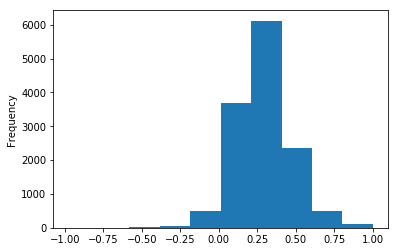

In [149]:
df.reviewPol.plot.hist()

In [150]:
df.reviewPol.mean()

0.29029116361026874

In [151]:
df['pol_bi'] = df['reviewPol'].apply(lambda x: 1 if x >0 else 0)

In [152]:
df['pol_bi_l'] = df['reviewPol_l'].apply(lambda x: 1 if x >0 else 0)

In [153]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,reviewText,Rating,Recommended IND,Positive Feedback Count,Division Name,departmentName,Class Name,reviewWords,reviewChars,departmentValue,sentiment,preds_log,sentiment_r,preds_nb,preds_log2,blob,blob_l,reviewPol,reviewSubj,reviewPol_l,reviewSubj_l,pol_bi,pol_bi_l
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303,2,2,2,1,1,1,"(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)","(L, o, v, e, , t, h, i, s, , d, r, e, s, s, !, , , i, t, ', s, , s, o, o, o, , p, r, e, t, t, y, ., , , i, , h, a, p, p, e, n, e, d, , t, o, , f, i, n, d, , i, t, , i, n, , a, , s, t, o, r, e, ,, , a, n, d, , i, ', m, , g, l, a, d, , i, , d, i, d, , b, c, , i, , n, e, v, e, r, ...)",0.339583,0.725,0.339583,0.725,1,1
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,3,2,2,1,1,1,"(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)","(I, , l, o, v, e, ,, , l, o, v, e, ,, , l, o, v, e, , t, h, i, s, , j, u, m, p, s, u, i, t, ., , i, t, ', s, , f, u, n, ,, , f, l, i, r, t, y, ,, , a, n, d, , f, a, b, u, l, o, u, s, !, , e, v, e, r, y, , t, i, m, e, , i, , w, e, a, r, , i, t, ,, , i, , g, e, t, , n, o, t, h, i, n, ...)",0.550000,0.625,0.550000,0.625,1,1


In [154]:
#accuracy before lemmatization
print(metrics.accuracy_score(df.sentiment_r, df.pol_bi))

0.9385675756667665


In [155]:
#accuracy after lemmatization
print(metrics.accuracy_score(df.sentiment_r, df.pol_bi_l))

0.9385675756667665


Lemmatization does not improve accuracy

## Next steps: 
1. Deploy using Flask
2. Deploy on an EC2 instance using AWS